# Notebook 1: Theoretical Background on NEXRAD and Radar Parameters

## 1. Introduction to Weather Radar Systems

Weather radar systems are remote sensing instruments that transmit electromagnetic waves into the atmosphere and analyze the returning signals (echoes) to identify and characterize precipitation and other atmospheric phenomena. These systems operate on the principle that hydrometeors (water droplets, ice crystals, hail, etc.) scatter and reflect the radar's electromagnetic energy.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

### 1.1 NEXRAD (Next Generation Radar) System Overview

NEXRAD, or WSR-88D (Weather Surveillance Radar - 1988 Doppler), is the primary weather radar network in the United States. This network consists of 159 high-resolution S-band Doppler weather radars operated by the National Weather Service (NWS), Federal Aviation Administration (FAA), and the U.S. Air Force.

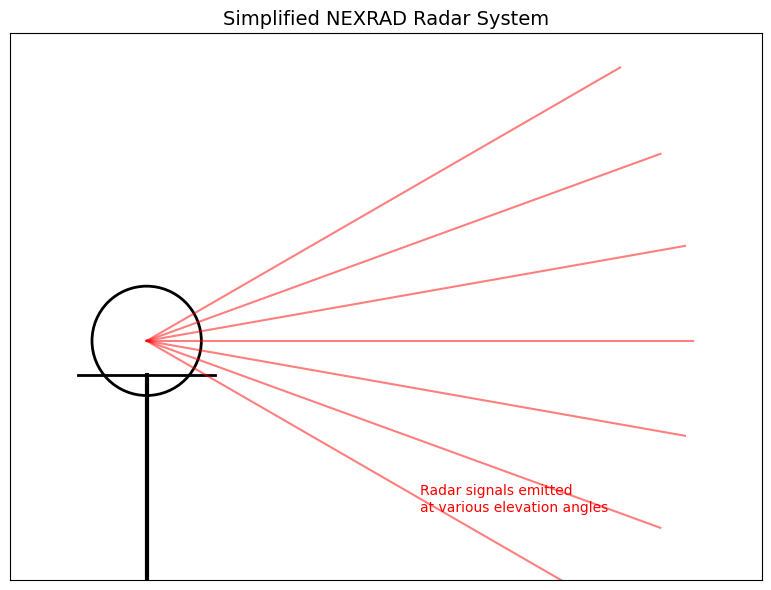

In [2]:
# Display a simple diagram of a NEXRAD radar system
fig, ax = plt.subplots(figsize=(10, 6))

# Draw radar tower
ax.plot([0, 0], [0, 3], 'k-', linewidth=3)
ax.plot([-1, 1], [3, 3], 'k-', linewidth=2)

# Draw radar dish
ellipse = plt.Circle((0, 3.5), 0.8, fill=False, color='k', linewidth=2)
ax.add_artist(ellipse)

# Draw radar beams
for angle in np.linspace(-30, 30, 7):
    rad_angle = np.deg2rad(angle)
    ax.plot([0, 8*np.cos(rad_angle)], [3.5, 3.5+8*np.sin(rad_angle)], 'r-', alpha=0.5)

ax.set_xlim(-2, 9)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.set_title('Simplified NEXRAD Radar System', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.text(4, 1, 'Radar signals emitted\nat various elevation angles', color='r')

plt.tight_layout()
plt.show()


Key specifications of NEXRAD radars:
- **Frequency**: 2.7 to 3.0 GHz (S-band)
- **Wavelength**: ~10 cm
- **Peak Power**: 750 kW
- **Pulse Duration**: 1.57 μs and 4.7 μs
- **Beam Width**: 0.95° (approximately 1 km at 100 km range)
- **Range Resolution**: 250 m (reflectivity) and 250 m or 1 km (velocity)
- **Maximum Range**: 460 km (reflectivity) and 300 km (velocity)

The S-band frequency is particularly advantageous for weather observations as it experiences minimal attenuation through precipitation, allowing for accurate measurements even in heavy rainfall or hail.

### 1.2 NEXRAD Operating Principles

NEXRAD radars operate using the following sequence:

1. **Transmission**: The radar transmits a short pulse of electromagnetic energy in a specific direction.
2. **Scattering**: This energy interacts with hydrometeors in the atmosphere.
3. **Reception**: A portion of this energy is scattered back toward the radar and received.
4. **Analysis**: The received signal is analyzed for various properties to determine:
   - Distance to targets (from time delay)
   - Motion of targets (from Doppler shift)
   - Shape/composition of targets (from polarimetric parameters)

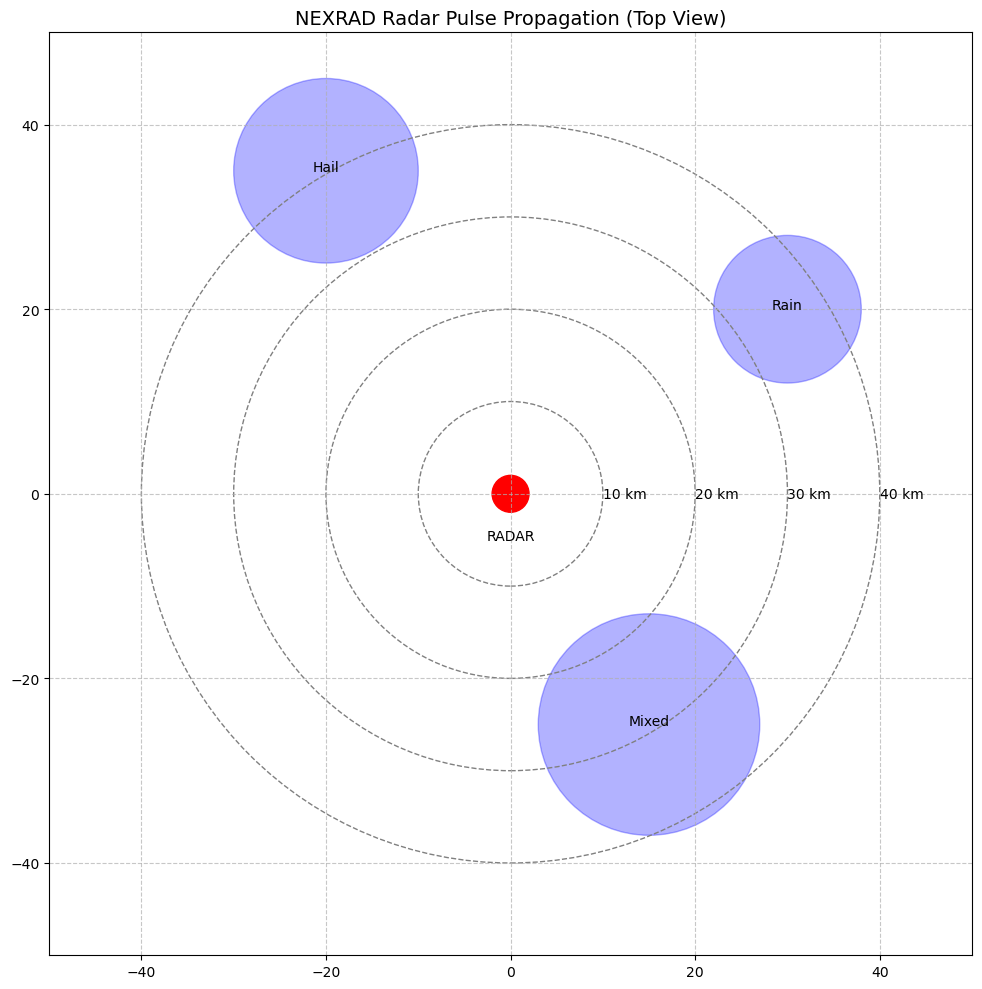

In [3]:
# Demonstrate the radar pulse propagation
def radar_pulse_animation():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Plot radar at origin
    radar = plt.Circle((0, 0), 2, color='red')
    ax.add_patch(radar)
    ax.text(0, -5, 'RADAR', ha='center')
    
    # Plot some precipitation areas
    precip1 = plt.Circle((30, 20), 8, color='blue', alpha=0.3)
    precip2 = plt.Circle((-20, 35), 10, color='blue', alpha=0.3)
    precip3 = plt.Circle((15, -25), 12, color='blue', alpha=0.3)
    ax.add_patch(precip1)
    ax.add_patch(precip2)
    ax.add_patch(precip3)
    ax.text(30, 20, 'Rain', ha='center')
    ax.text(-20, 35, 'Hail', ha='center')
    ax.text(15, -25, 'Mixed', ha='center')
    
    # Create pulse circles at different ranges
    ranges = [10, 20, 30, 40]
    for r in ranges:
        circle = plt.Circle((0, 0), r, fill=False, color='gray', linestyle='--')
        ax.add_patch(circle)
        ax.text(r, 0, f'{r} km', va='center')
    
    ax.set_title('NEXRAD Radar Pulse Propagation (Top View)', fontsize=14)
    plt.tight_layout()
    plt.show()

radar_pulse_animation()

NEXRAD radars utilize Volume Coverage Patterns (VCPs) - predefined scanning strategies that specify a sequence of antenna elevations to create a three-dimensional view of the atmosphere. Different VCPs are used depending on weather conditions:
- **Clear Air Mode**: Slower scanning used in clear conditions, maximizing sensitivity
- **Precipitation Mode**: Faster scanning with more elevation angles used during precipitation events

## 2. Radar Parameters and Their Physical Meaning

### 2.1 Azimuth and Range: Spatial Positioning

**Azimuth** refers to the horizontal angle of the radar beam measured clockwise from true north (0°). It indicates the directional orientation of the radar beam. Azimuths range from 0° to 359.9°.

**Range** is the distance from the radar to the target, measured in kilometers. Combined with azimuth, range allows for precise spatial positioning of hydrometeors in a polar coordinate system.

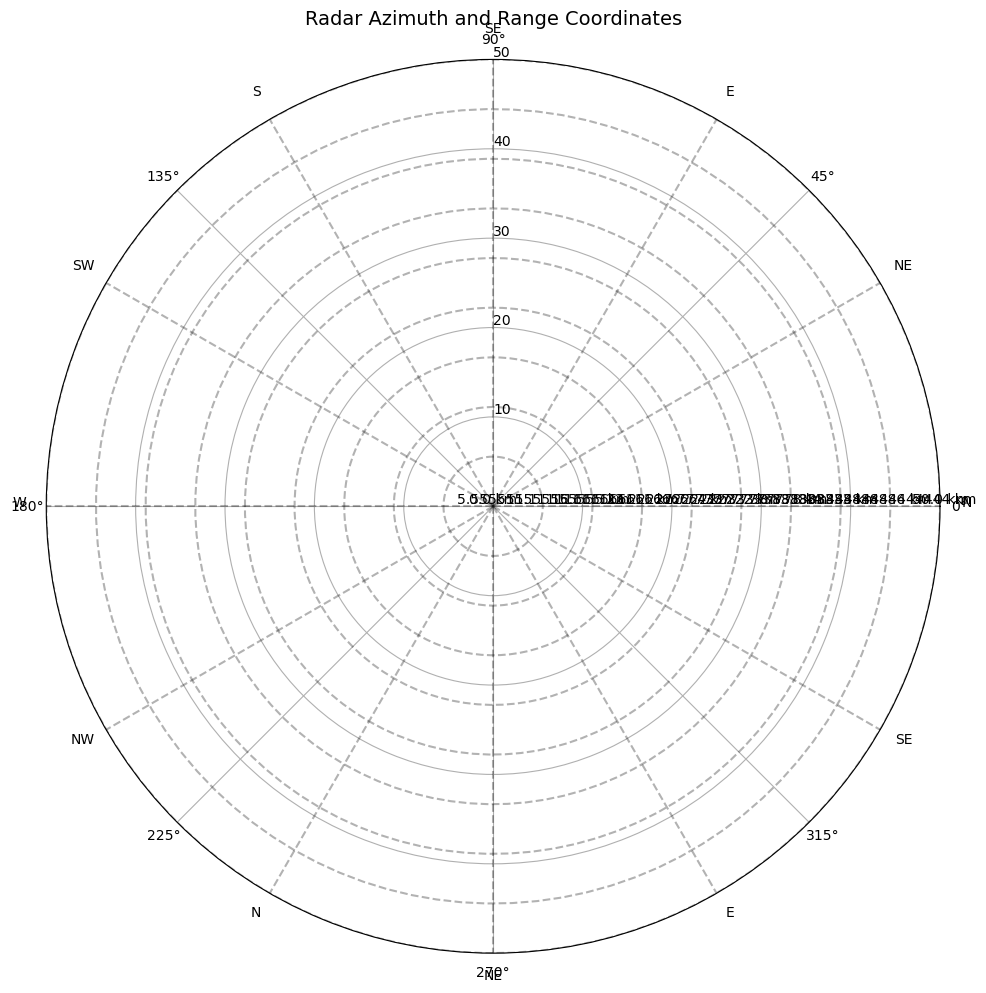

In [4]:
# Demonstrate the polar coordinate system used by radar
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 50, 10)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot range rings
for radius in r:
    ax.plot(theta, np.ones_like(theta) * radius, 'k--', alpha=0.3)
    ax.text(0, radius, f'{radius} km', ha='center', va='bottom')

# Plot azimuth lines
for angle in np.arange(0, 2*np.pi, np.pi/6):
    ax.plot([angle, angle], [0, 50], 'k--', alpha=0.3)
    direction = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N', 'NE', 'E', 'SE']
    idx = int(angle / (np.pi/6)) % 12
    ax.text(angle, 53, direction[idx], ha='center')

ax.set_title('Radar Azimuth and Range Coordinates', fontsize=14)
ax.set_rlim(0, 50)
ax.set_rticks([10, 20, 30, 40, 50])
ax.set_rlabel_position(90)
plt.tight_layout()
plt.show()


### 2.2 Differential Reflectivity (ZDR)

Differential Reflectivity (ZDR) is the ratio of the horizontally polarized reflectivity to the vertically polarized reflectivity, expressed in decibels (dB):

$Z_{DR} = Z_H - Z_V = 10 \log_{10}\left(\frac{Z_H}{Z_V}\right)$

Where:
- $Z_H$ is the horizontally polarized reflectivity
- $Z_V$ is the vertically polarized reflectivity

ZDR provides information about the shape of hydrometeors:
- **Positive ZDR values** indicate horizontally oriented particles (oblate spheroids) like raindrops
- **Near-zero ZDR values** suggest spherical particles like small raindrops or hail
- **Negative ZDR values** can indicate vertically oriented ice crystals or hail tumbling in specific orientations


C:\Users\disha\AppData\Local\Temp\ipykernel_240\1895577827.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = patches.Ellipse(shape['position'], shape['width'], shape['height'],


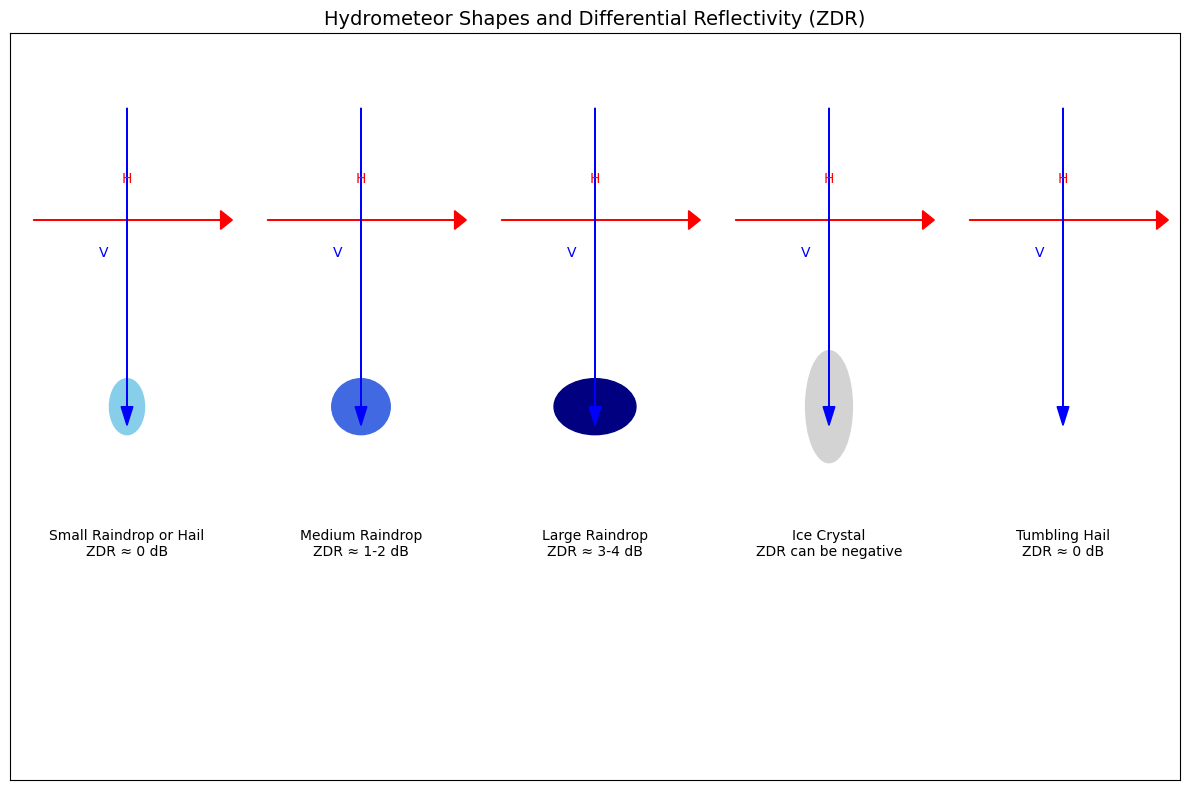

In [17]:

import matplotlib.patches as patches
# Illustrate different hydrometeor shapes and their ZDR values
fig, ax = plt.subplots(figsize=(12, 8))

# Draw different hydrometeor shapes
shapes = [
    {'position': (1, 4), 'width': 0.3, 'height': 0.3, 'label': 'Small Raindrop or Hail\nZDR ≈ 0 dB', 'color': 'skyblue'},
    {'position': (3, 4), 'width': 0.5, 'height': 0.3, 'label': 'Medium Raindrop\nZDR ≈ 1-2 dB', 'color': 'royalblue'},
    {'position': (5, 4), 'width': 0.7, 'height': 0.3, 'label': 'Large Raindrop\nZDR ≈ 3-4 dB', 'color': 'navy'},
    {'position': (7, 4), 'width': 0.4, 'height': 0.6, 'label': 'Ice Crystal\nZDR can be negative', 'color': 'lightgray'},
    {'position': (9, 4), 'width': 0.5, 'height': 0.5, 'label': 'Tumbling Hail\nZDR ≈ 0 dB', 'color': 'white', 'edge': 'black'}
]

for shape in shapes:
    ellipse = patches.Ellipse(shape['position'], shape['width'], shape['height'], 
                         color=shape['color'], edgecolor=shape.get('edge', shape['color']))
    ax.add_patch(ellipse)
    ax.text(shape['position'][0], shape['position'][1]-0.8, shape['label'], ha='center')

# Add arrows to indicate polarization
for i, x in enumerate([1, 3, 5, 7, 9]):
    ax.arrow(x-0.8, 5, 1.6, 0, head_width=0.1, head_length=0.1, fc='red', ec='red')
    ax.text(x, 5.2, 'H', color='red', ha='center')
    
    ax.arrow(x, 5.6, 0, -1.6, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    ax.text(x-0.2, 4.8, 'V', color='blue', ha='center')

ax.set_xlim(0, 10)
ax.set_ylim(2, 6)
ax.set_title('Hydrometeor Shapes and Differential Reflectivity (ZDR)', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

In hailstorm detection, ZDR is critical because:
- Large hailstones often tumble as they fall, appearing nearly spherical to the radar
- This tumbling results in similar reflectivity values in both horizontal and vertical polarizations
- Therefore, hail typically exhibits ZDR values near 0 dB
- A "ZDR column" (vertical column of enhanced ZDR) can indicate strong updrafts that may produce hail

### 2.3 Specific Differential Phase (KDP)

Specific Differential Phase (KDP) measures the phase shift difference between horizontally and vertically polarized waves per unit distance, expressed in degrees per kilometer (°/km):

$K_{DP} = \frac{\Phi_{DP}(r_2) - \Phi_{DP}(r_1)}{2(r_2 - r_1)}$

Where:
- $\Phi_{DP}$ is the total differential phase
- $r_1$ and $r_2$ are ranges from the radar

KDP provides information about:
- **Liquid water content**: Higher KDP values indicate higher concentrations of liquid water
- **Rain rate**: KDP has a nearly linear relationship with rain rate
- **Hydrometeor type**: Different values help distinguish between rain, hail, and mixed precipitation


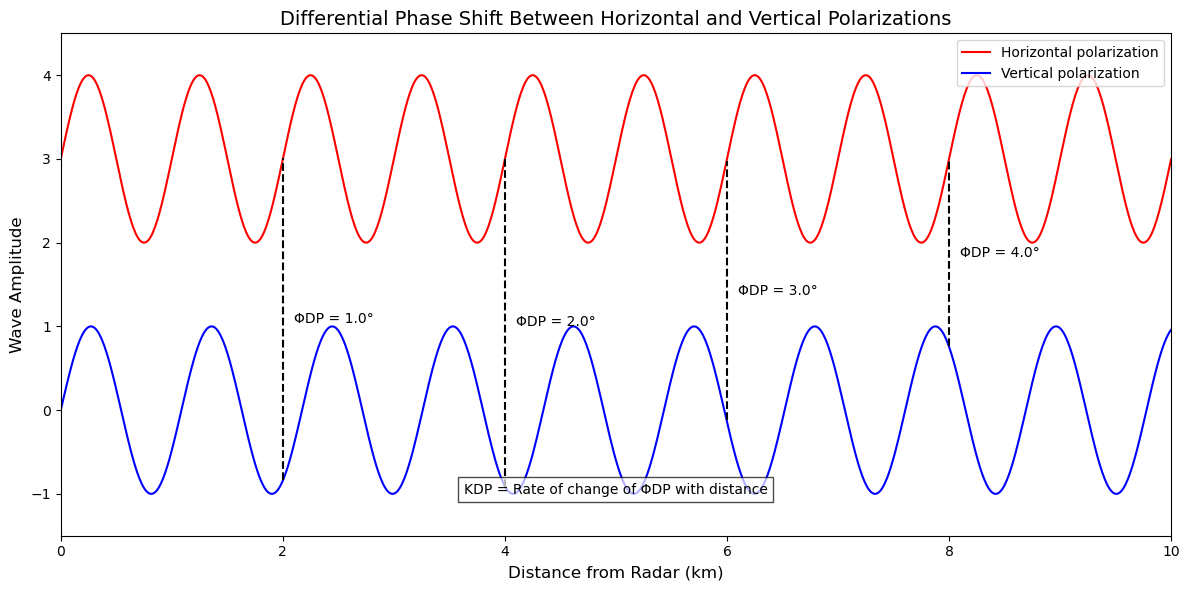

In [6]:
# Illustrate the phase shift concept
fig, ax = plt.subplots(figsize=(12, 6))

# Distance (range)
x = np.linspace(0, 10, 1000)

# Horizontal and vertical waves with different phase shifts
wave_h = np.sin(2 * np.pi * x)
wave_v = np.sin(2 * np.pi * x - 0.5 * x)  # Phase shifts with distance

# Plot waves
ax.plot(x, wave_h + 3, 'r-', label='Horizontal polarization')
ax.plot(x, wave_v, 'b-', label='Vertical polarization')

# Add phase difference indicators at various points
for i, xi in enumerate([2, 4, 6, 8]):
    idx = np.argmin(np.abs(x - xi))
    h_val = wave_h[idx] + 3
    v_val = wave_v[idx]
    
    # Draw vertical lines between waves
    ax.plot([xi, xi], [v_val, h_val], 'k--')
    
    # Calculate and display phase difference
    phase_diff = 0.5 * xi  # In this example, phase difference grows linearly with distance
    ax.text(xi+0.1, (h_val + v_val)/2, f'ΦDP = {phase_diff:.1f}°', va='center')

ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 4.5)
ax.set_xlabel('Distance from Radar (km)', fontsize=12)
ax.set_ylabel('Wave Amplitude', fontsize=12)
ax.set_title('Differential Phase Shift Between Horizontal and Vertical Polarizations', fontsize=14)
ax.legend(loc='upper right')

# Add KDP explanation
ax.text(5, -1, 'KDP = Rate of change of ΦDP with distance', ha='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


In hailstorm detection, KDP is valuable because:
- Regions with high KDP (>2 °/km) often indicate heavy rain
- Areas with high reflectivity but low KDP may indicate hail
- The patterns of KDP in relation to other parameters help identify the hail growth region within storms

### 2.4 Spectrum Width

Spectrum Width represents the variance of velocity measurements within a radar sampling volume, measured in meters per second (m/s). It indicates:
- **Turbulence**: Higher values suggest greater turbulence
- **Wind shear**: Speed and directional changes within the sample volume
- **Mixture of particle types**: Different hydrometeors moving at various speeds


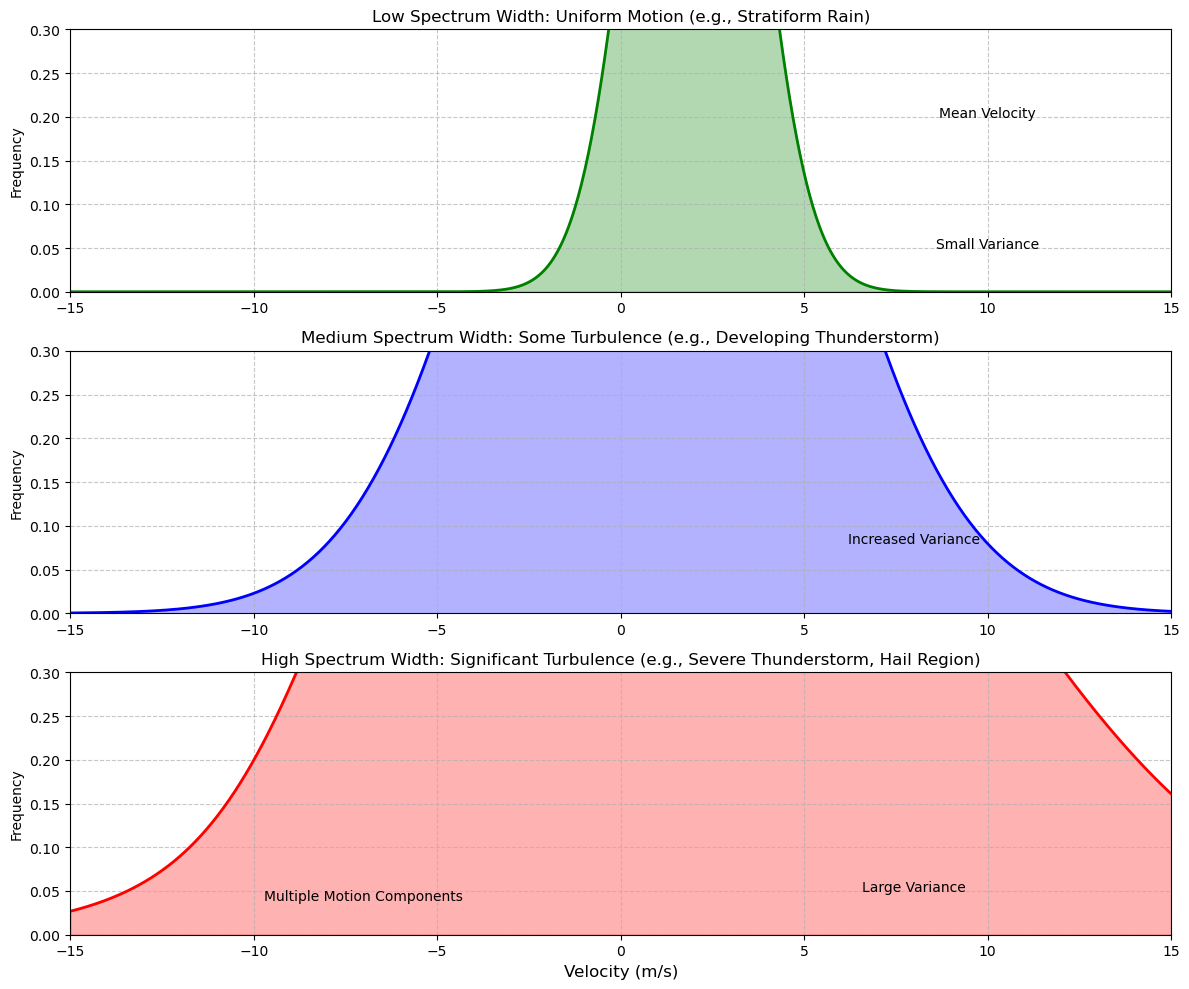

In [7]:
# Visualize the concept of spectrum width
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Velocity distribution examples
v = np.linspace(-15, 15, 1000)

# Narrow spectrum (low spectrum width)
narrow = np.exp(-(v-2)**2/(2*1.5**2))
ax1.plot(v, narrow, 'g-', linewidth=2)
ax1.fill_between(v, 0, narrow, color='green', alpha=0.3)
ax1.set_title('Low Spectrum Width: Uniform Motion (e.g., Stratiform Rain)', fontsize=12)
ax1.text(10, 0.2, 'Mean Velocity', ha='center')
ax1.text(10, 0.05, 'Small Variance', ha='center')
ax1.set_ylabel('Frequency')

# Medium spectrum
medium = np.exp(-(v-1)**2/(2*4**2))
ax2.plot(v, medium, 'b-', linewidth=2)
ax2.fill_between(v, 0, medium, color='blue', alpha=0.3)
ax2.set_title('Medium Spectrum Width: Some Turbulence (e.g., Developing Thunderstorm)', fontsize=12)
ax2.text(8, 0.08, 'Increased Variance', ha='center')
ax2.set_ylabel('Frequency')

# Wide spectrum
wide = 0.7*np.exp(-(v-3)**2/(2*7**2)) + 0.3*np.exp(-(v+5)**2/(2*3**2))
ax3.plot(v, wide, 'r-', linewidth=2)
ax3.fill_between(v, 0, wide, color='red', alpha=0.3)
ax3.set_title('High Spectrum Width: Significant Turbulence (e.g., Severe Thunderstorm, Hail Region)', fontsize=12)
ax3.text(8, 0.05, 'Large Variance', ha='center')
ax3.text(-7, 0.04, 'Multiple Motion Components', ha='center')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Velocity (m/s)', fontsize=12)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-15, 15)
    ax.set_ylim(0, 0.3)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In hailstorm detection, Spectrum Width is important because:
- Hail-producing thunderstorms typically show high spectrum width values
- Areas of strong updrafts (where hail forms) often exhibit increased spectrum width
- The boundary between inflow and outflow regions shows enhanced spectrum width
- Turbulent regions indicate areas of strong storm dynamics that may support hail formation

### 2.5 Velocity (Doppler Velocity)

Doppler Velocity measures the radial component of hydrometeor motion relative to the radar, expressed in meters per second (m/s). Positive values indicate motion away from the radar, while negative values represent motion toward the radar.


C:\Users\disha\AppData\Local\Temp\ipykernel_240\3685368828.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')


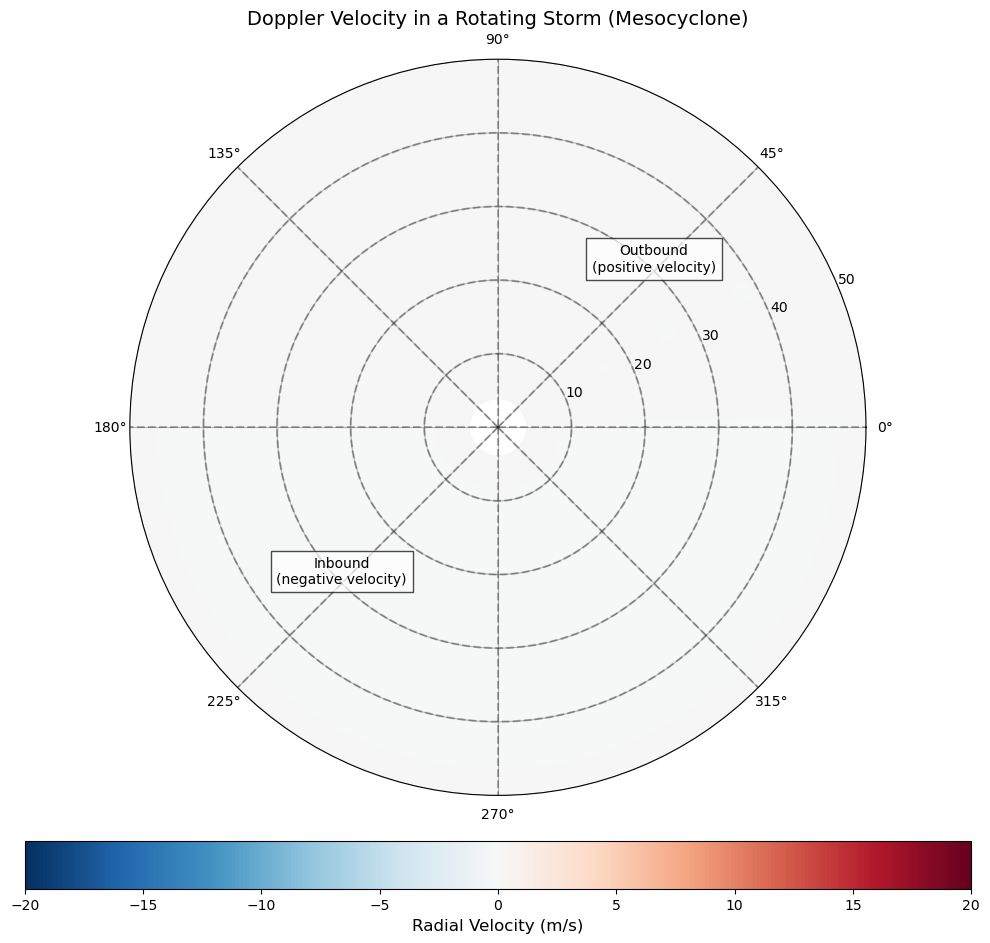

In [8]:
# Create a simple model of velocity patterns in a rotating storm
azimuths = np.linspace(0, 2*np.pi, 100)
ranges = np.linspace(5, 50, 20)

R, A = np.meshgrid(ranges, azimuths)
X = R * np.cos(A)
Y = R * np.sin(A)

# Create a velocity field for a cyclonic (counterclockwise) rotation
center_x, center_y = 0, 0
dx = X - center_x
dy = Y - center_y
distance = np.sqrt(dx**2 + dy**2)

# Tangential velocity increases with distance from center up to a point, then decreases
tangential_vel = 20 * (distance/20) * np.exp(-(distance-20)**2/400)

# Convert to radial velocity (what the radar sees)
angle = np.arctan2(dy, dx)
radial_vel = -tangential_vel * np.sin(angle - A)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
cmap = plt.cm.get_cmap('RdBu_r')
cs = ax.pcolormesh(A, R, radial_vel, cmap=cmap, vmin=-20, vmax=20)

# Add distance circles and azimuth lines
for r in [10, 20, 30, 40]:
    ax.plot(azimuths, np.ones_like(azimuths) * r, 'k--', alpha=0.3)
    
for angle in np.arange(0, 2*np.pi, np.pi/4):
    ax.plot([angle, angle], [0, 50], 'k--', alpha=0.3)

ax.set_rticks([10, 20, 30, 40, 50])
ax.set_rlim(0, 50)
ax.set_title('Doppler Velocity in a Rotating Storm (Mesocyclone)', fontsize=14)
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label('Radial Velocity (m/s)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Add annotations for incoming and outgoing velocities
ax.text(np.pi/4, 30, 'Outbound\n(positive velocity)', ha='center', bbox=dict(facecolor='white', alpha=0.7))
ax.text(5*np.pi/4, 30, 'Inbound\n(negative velocity)', ha='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


In hailstorm detection, Velocity data is critical for:
- **Identifying rotation**: Mesocyclones (rotating updrafts) are often associated with severe thunderstorms that produce hail
- **Detecting wind shear**: Strong wind shear supports thunderstorm organization and severity
- **Observing divergence patterns**: Upper-level divergence can indicate strong updrafts necessary for hail formation
- **Tracking storm motion**: Understanding storm propagation aids in forecasting hail threats

## 3. Radar Scattering Theory and Hail Detection

### 3.1 Rayleigh Scattering

When hydrometeors are small compared to the radar wavelength (D << λ), Rayleigh scattering dominates. In this regime:
- Radar reflectivity is proportional to D^6 (sixth power of particle diameter)
- Small increases in particle size cause large increases in reflectivity
- For S-band radar (λ ≈ 10 cm), this applies to raindrops and small hailstones


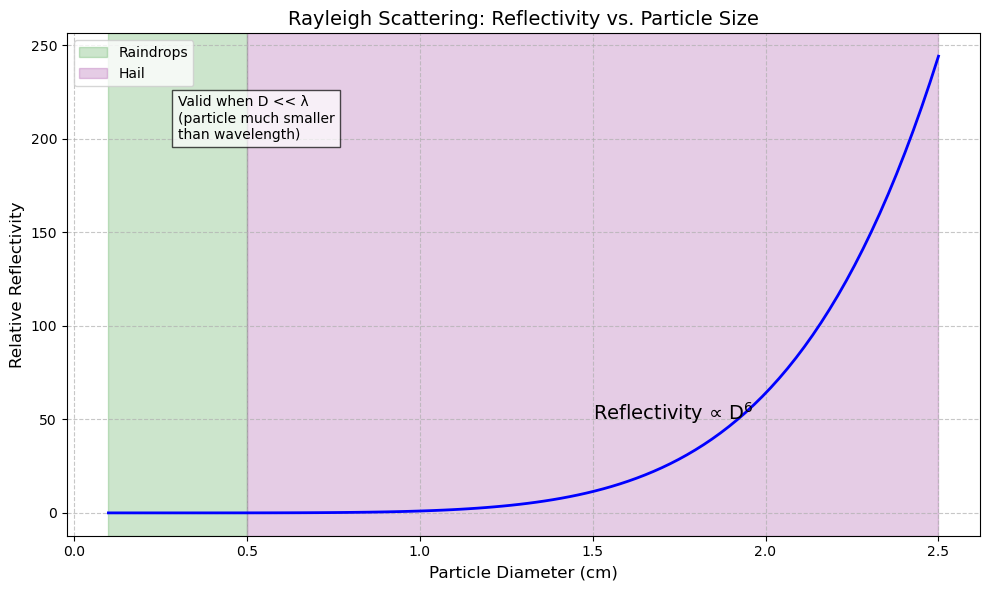

In [9]:
# Demonstrate the relationship between particle size and reflectivity in Rayleigh scattering
diameters = np.linspace(0.1, 2.5, 100)
reflectivity_rayleigh = diameters**6

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diameters, reflectivity_rayleigh, 'b-', linewidth=2)
ax.set_xlabel('Particle Diameter (cm)', fontsize=12)
ax.set_ylabel('Relative Reflectivity', fontsize=12)
ax.set_title('Rayleigh Scattering: Reflectivity vs. Particle Size', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Mark regions for different hydrometeors
ax.axvspan(0.1, 0.5, alpha=0.2, color='green', label='Raindrops')
ax.axvspan(0.5, 2.5, alpha=0.2, color='purple', label='Hail')

# Add note about D^6 relationship
ax.text(1.5, 50, 'Reflectivity ∝ D$^6$', fontsize=14)

# Add a note about when Rayleigh scattering applies
ax.text(0.3, 200, 'Valid when D << λ\n(particle much smaller\nthan wavelength)', 
        bbox=dict(facecolor='white', alpha=0.7))

ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 3.2 Mie Scattering

As hydrometeors approach the size of the radar wavelength (D ≈ λ), Mie scattering becomes important:
- The D^6 relationship no longer holds
- Reflectivity oscillates with increasing particle size
- For S-band radar, this applies to large hailstones (>2 cm)

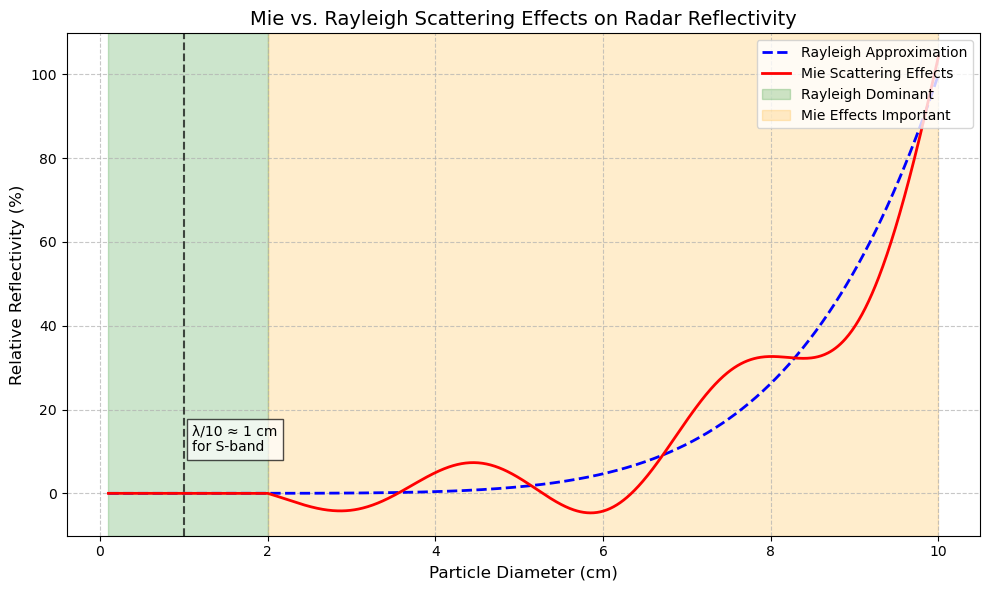

In [10]:
# Demonstrate Mie scattering effects
diameters = np.linspace(0.1, 10, 1000)
reflectivity_rayleigh = diameters**6 / max(diameters**6) * 100

# Create a simplified model of Mie scattering behavior
# (In reality, this would be calculated using complex Mie theory equations)
reflectivity_mie = diameters**6 / max(diameters**6) * 100
for i, d in enumerate(diameters):
    if d > 2:
        oscillation = 15 * np.sin((d-2) * 2) * (d/10)
        reflectivity_mie[i] -= oscillation

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diameters, reflectivity_rayleigh, 'b--', linewidth=2, label='Rayleigh Approximation')
ax.plot(diameters, reflectivity_mie, 'r-', linewidth=2, label='Mie Scattering Effects')
ax.set_xlabel('Particle Diameter (cm)', fontsize=12)
ax.set_ylabel('Relative Reflectivity (%)', fontsize=12)
ax.set_title('Mie vs. Rayleigh Scattering Effects on Radar Reflectivity', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Mark the transition region
ax.axvspan(0.1, 2, alpha=0.2, color='green', label='Rayleigh Dominant')
ax.axvspan(2, 10, alpha=0.2, color='orange', label='Mie Effects Important')

# Add vertical line at wavelength/10
ax.axvline(x=10/10, color='k', linestyle='--', alpha=0.7)
ax.text(1.1, 10, 'λ/10 ≈ 1 cm\nfor S-band', rotation=0, 
        bbox=dict(facecolor='white', alpha=0.7))

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 3.3 T-Matrix Method

The T-Matrix (Transition Matrix) method extends beyond Mie theory to handle non-spherical particles:
- It's particularly useful for modeling radar signals from raindrops (oblate spheroids)
- Accounts for particle orientation and shape
- Helps explain polarimetric radar signatures


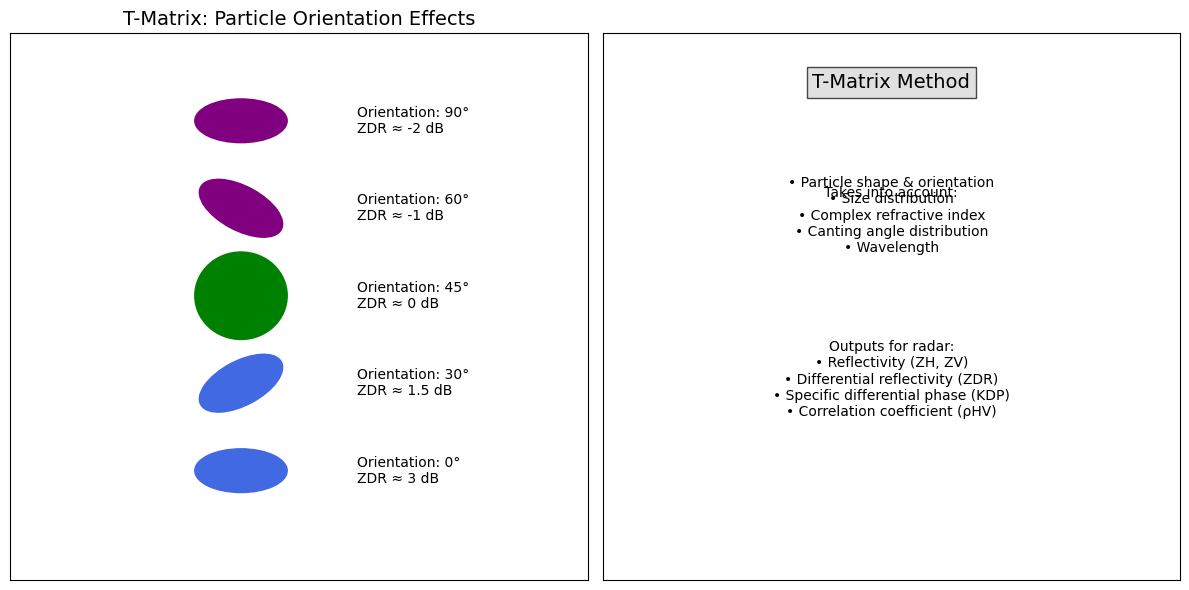

In [16]:
import matplotlib.patches as patches

# Simple visualization of T-Matrix application to different hydrometeor shapes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a simple diagram showing different particle orientations
orientations = [0, 30, 45, 60, 90]
shapes = ['oblate', 'oblate', 'sphere', 'prolate', 'prolate']
zdr_values = [3, 1.5, 0, -1, -2]

for i, (angle, shape, zdr) in enumerate(zip(orientations, shapes, zdr_values)):
    y_pos = i * 0.8 + 1
    
    # Draw particle
    if shape == 'oblate':
        ellipse = patches.Ellipse((2, y_pos), 0.8, 0.4, angle=angle, color='royalblue')
    elif shape == 'sphere':
        ellipse = patches.Circle((2, y_pos), 0.4, color='green')
    else:  # prolate
        ellipse = patches.Ellipse((2, y_pos), 0.4, 0.8, angle=angle, color='purple')
    
    ax1.add_patch(ellipse)
    ax1.text(3, y_pos, f'Orientation: {angle}°\nZDR ≈ {zdr} dB', va='center')

ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.set_title('T-Matrix: Particle Orientation Effects', fontsize=14)
ax1.set_xticks([])
ax1.set_yticks([])

# Create visualization of T-Matrix calculations
ax2.text(0.5, 0.9, 'T-Matrix Method', fontsize=14, ha='center', 
         bbox=dict(facecolor='lightgray', alpha=0.7))
ax2.text(0.5, 0.7, 'Takes into account:', ha='center')
ax2.text(0.5, 0.6, '• Particle shape & orientation\n• Size distribution\n• Complex refractive index\n• Canting angle distribution\n• Wavelength', ha='center')
ax2.text(0.5, 0.3, 'Outputs for radar:\n• Reflectivity (ZH, ZV)\n• Differential reflectivity (ZDR)\n• Specific differential phase (KDP)\n• Correlation coefficient (ρHV)', ha='center')

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.show()


### 3.4 Hail Detection Signatures

Based on the theoretical principles discussed, several radar signatures are used to detect hail:


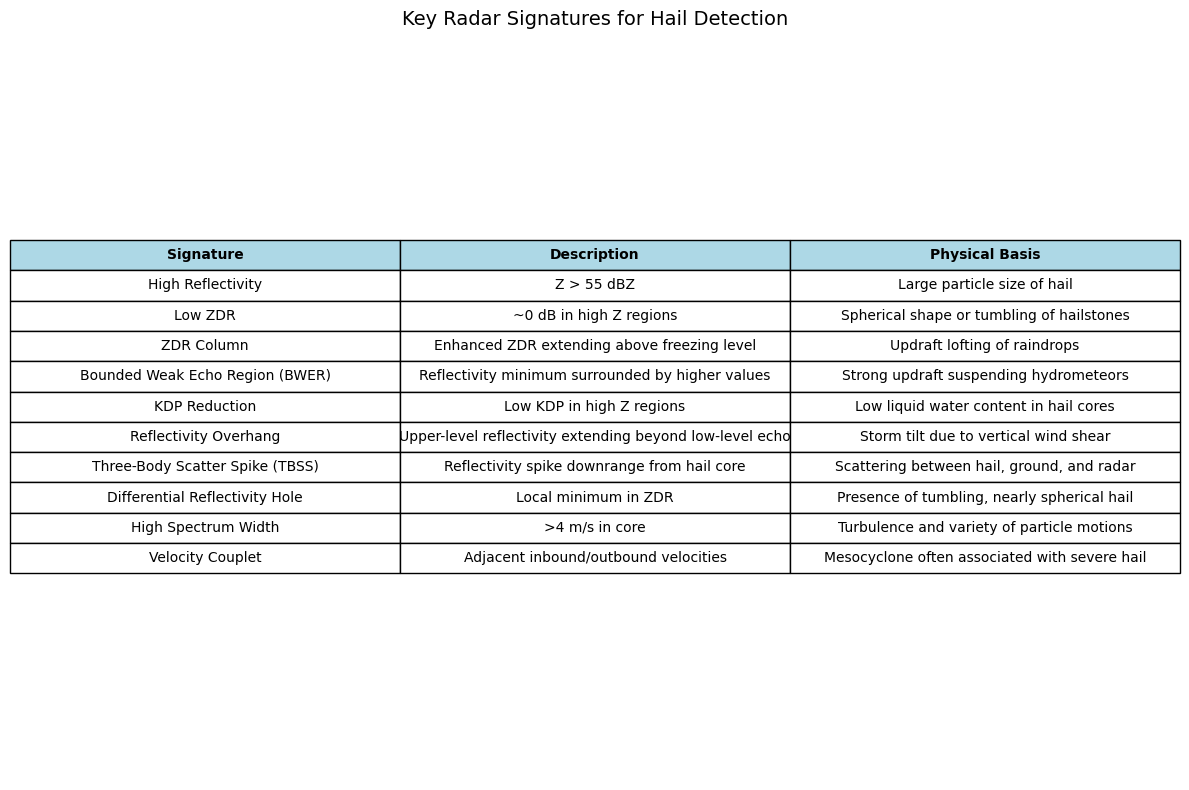

In [13]:
# Create a table of hail detection signatures
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

hail_signatures = [
    ['Signature', 'Description', 'Physical Basis'],
    ['High Reflectivity', 'Z > 55 dBZ', 'Large particle size of hail'],
    ['Low ZDR', '~0 dB in high Z regions', 'Spherical shape or tumbling of hailstones'],
    ['ZDR Column', 'Enhanced ZDR extending above freezing level', 'Updraft lofting of raindrops'],
    ['Bounded Weak Echo Region (BWER)', 'Reflectivity minimum surrounded by higher values', 'Strong updraft suspending hydrometeors'],
    ['KDP Reduction', 'Low KDP in high Z regions', 'Low liquid water content in hail cores'],
    ['Reflectivity Overhang', 'Upper-level reflectivity extending beyond low-level echo', 'Storm tilt due to vertical wind shear'],
    ['Three-Body Scatter Spike (TBSS)', 'Reflectivity spike downrange from hail core', 'Scattering between hail, ground, and radar'],
    ['Differential Reflectivity Hole', 'Local minimum in ZDR', 'Presence of tumbling, nearly spherical hail'],
    ['High Spectrum Width', '>4 m/s in core', 'Turbulence and variety of particle motions'],
    ['Velocity Couplet', 'Adjacent inbound/outbound velocities', 'Mesocyclone often associated with severe hail']
]

table = ax.table(cellText=hail_signatures[1:], colLabels=hail_signatures[0], 
              cellLoc='center', loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
# Set colors for header row
for j, cell in enumerate(table._cells[(0, j)] for j in range(3)):
    cell.set_facecolor('lightblue')
    cell.set_text_props(weight='bold')

ax.set_title('Key Radar Signatures for Hail Detection', fontsize=14)
plt.tight_layout()
plt.show()


## 4. Integration of Parameters for Hail Detection

The combined analysis of multiple radar parameters significantly improves hail detection capabilities.


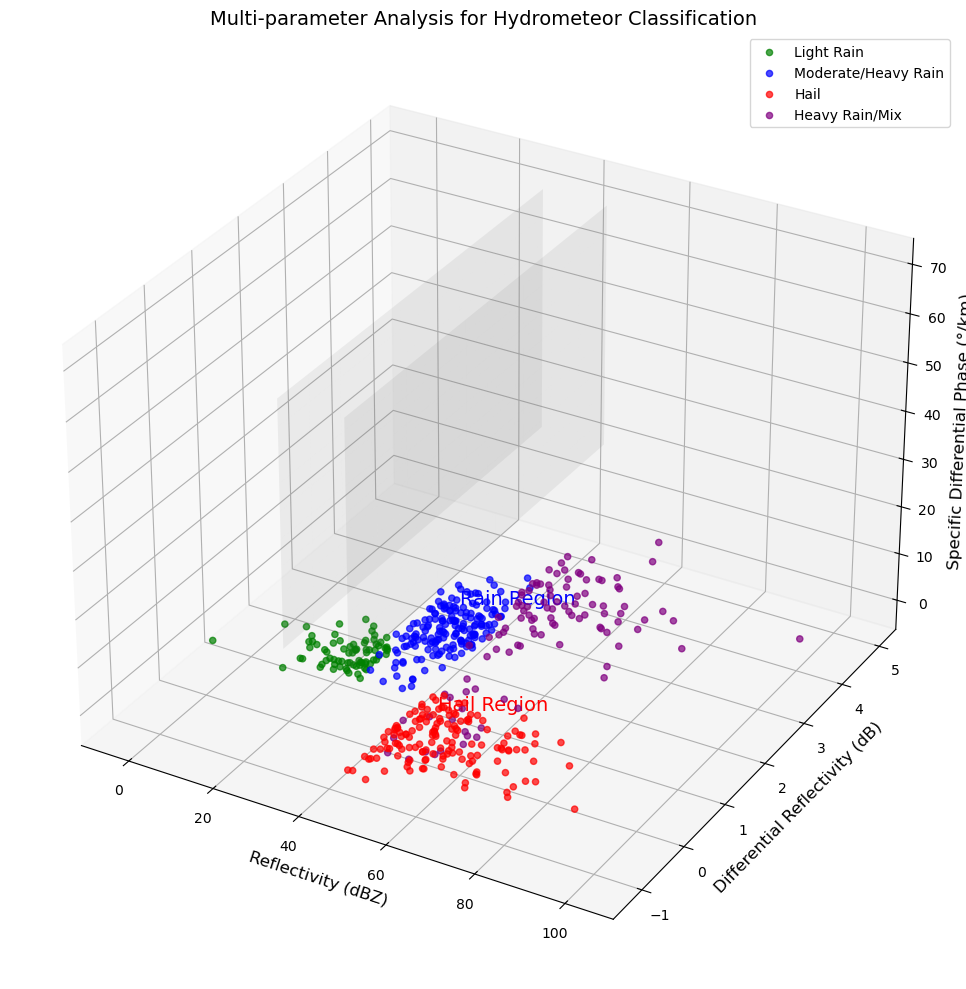

In [14]:
# Demonstrate multi-parameter analysis using a scatter plot with simulated data
np.random.seed(42)
n_points = 500

# Generate synthetic data for demonstration
# This simulates observations in a storm with different hydrometeor types
reflectivity = np.random.normal(45, 15, n_points)
zdr = np.zeros_like(reflectivity)
kdp = np.zeros_like(reflectivity)

# Assign ZDR and KDP based on reflectivity and hydrometeor type logic
for i in range(n_points):
    if reflectivity[i] < 30:  # Light rain
        zdr[i] = np.random.normal(1, 0.3)
        kdp[i] = np.random.normal(0.5, 0.2)
    elif reflectivity[i] < 45:  # Moderate to heavy rain
        zdr[i] = np.random.normal(2, 0.5)
        kdp[i] = np.random.normal(2, 0.7)
    else:  # Potential hail region
        # For high reflectivity: mix of hail (low ZDR, low KDP) and heavy rain (high ZDR, high KDP)
        if np.random.rand() < 0.7:  # 70% chance it's hail for high reflectivity
            zdr[i] = np.random.normal(0, 0.5)
            kdp[i] = np.random.normal(0.2, 0.5)
            
        else:  # 30% chance it's very heavy rain
            zdr[i] = np.random.normal(3, 0.7)
            kdp[i] = np.random.normal(4, 1)

# Create a classification based on these parameters
classification = np.zeros_like(reflectivity, dtype=int)
for i in range(n_points):
    if reflectivity[i] < 30:
        classification[i] = 0  # Light rain
    elif reflectivity[i] < 45:
        classification[i] = 1  # Moderate/heavy rain
    elif reflectivity[i] >= 45 and zdr[i] < 1 and kdp[i] < 1:
        classification[i] = 2  # Hail
    else:
        classification[i] = 3  # Heavy rain / rain-hail mix

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different hydrometeor types
colors = ['green', 'blue', 'red', 'purple']
labels = ['Light Rain', 'Moderate/Heavy Rain', 'Hail', 'Heavy Rain/Mix']

# Plot each class
for i in range(4):
    idx = classification == i
    ax.scatter(reflectivity[idx], zdr[idx], kdp[idx], c=colors[i], label=labels[i], alpha=0.7)
    ax.set_xlabel('Reflectivity (dBZ)', fontsize=12)
    ax.set_ylabel('Differential Reflectivity (dB)', fontsize=12)
    ax.set_zlabel('Specific Differential Phase (°/km)', fontsize=12)
    ax.set_title('Multi-parameter Analysis for Hydrometeor Classification', fontsize=14)
    ax.legend()

# Add decision boundaries as semi-transparent planes
xx, yy = np.meshgrid(np.linspace(20, 70, 10), np.linspace(-1, 5, 10))
z30 = np.zeros_like(xx) + 0  # Reflectivity = 30 dBZ plane
z45 = np.zeros_like(xx) + 0  # Reflectivity = 45 dBZ plane

ax.plot_surface(np.ones_like(xx)*30, yy, xx, alpha=0.1, color='gray')
ax.plot_surface(np.ones_like(xx)*45, yy, xx, alpha=0.1, color='gray')

# Add annotations
ax.text(50, 0.5, 0.5, 'Hail Region', color='red', fontsize=14)
ax.text(35, 2.5, 2.5, 'Rain Region', color='blue', fontsize=14)

plt.tight_layout()
plt.show()


### 4.1 Hydrometeor Classification Algorithms (HCA)

Modern radar systems use Hydrometeor Classification Algorithms that:
- Integrate multiple radar parameters (Z, ZDR, KDP, etc.)
- Apply fuzzy logic to classify radar echoes
- Identify different precipitation types including hail
- Account for the physical characteristics of different hydrometeors


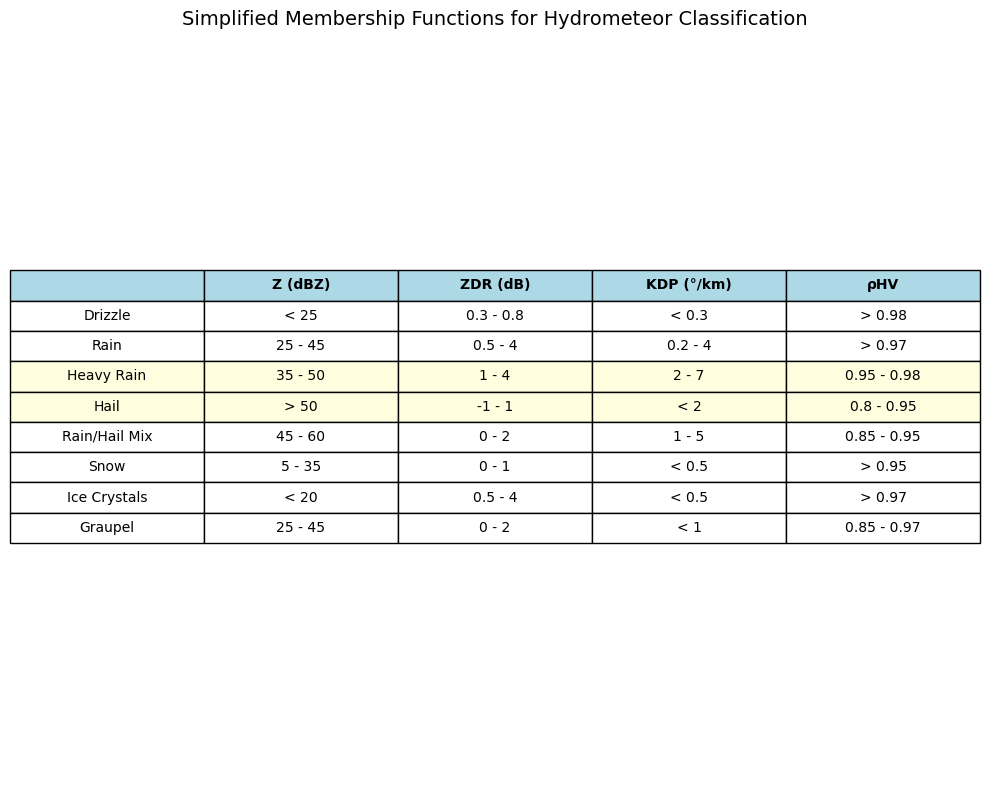

In [15]:

# Demonstrate a simplified fuzzy logic approach for hydrometeor classification
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')

# Create a table showing membership functions for different hydrometeors
hydro_class = [
    ['', 'Z (dBZ)', 'ZDR (dB)', 'KDP (°/km)', 'ρHV'],
    ['Drizzle', '< 25', '0.3 - 0.8', '< 0.3', '> 0.98'],
    ['Rain', '25 - 45', '0.5 - 4', '0.2 - 4', '> 0.97'],
    ['Heavy Rain', '35 - 50', '1 - 4', '2 - 7', '0.95 - 0.98'],
    ['Hail', '> 50', '-1 - 1', '< 2', '0.8 - 0.95'],
    ['Rain/Hail Mix', '45 - 60', '0 - 2', '1 - 5', '0.85 - 0.95'],
    ['Snow', '5 - 35', '0 - 1', '< 0.5', '> 0.95'],
    ['Ice Crystals', '< 20', '0.5 - 4', '< 0.5', '> 0.97'],
    ['Graupel', '25 - 45', '0 - 2', '< 1', '0.85 - 0.97']
]

table = ax.table(cellText=hydro_class[1:], colLabels=hydro_class[0], 
                cellLoc='center', loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Set colors for header row
for j, cell in enumerate(table._cells[(0, j)] for j in range(5)):
    cell.set_facecolor('lightblue')
    cell.set_text_props(weight='bold')

# Highlight hail-related rows
for i in [3, 4]:  # Hail and Rain/Hail Mix rows
    for j in range(5):
        table._cells[(i, j)].set_facecolor('lightyellow')

ax.set_title('Simplified Membership Functions for Hydrometeor Classification', fontsize=14)
plt.tight_layout()
plt.show()



## 5. Conclusion and References

### 5.1 Summary

NEXRAD radar systems and their dual-polarization capabilities provide an array of parameters crucial for detecting and characterizing hailstorms:

- **Reflectivity (Z)**: Identifies regions of high precipitation intensity and potential hail
- **Differential Reflectivity (ZDR)**: Helps distinguish hail from rain based on particle shape
- **Specific Differential Phase (KDP)**: Provides information about liquid water content and hydrometeor concentration
- **Spectrum Width**: Indicates turbulence and variability within storms
- **Velocity**: Reveals storm dynamics and rotation

The combined analysis of these parameters using theories like Rayleigh and Mie scattering, along with the T-Matrix method, significantly enhances our ability to detect hail and understand hailstorm dynamics.

### 5.2 References

1. Doviak, R. J., & Zrnić, D. S. (1993). *Doppler Radar and Weather Observations*. Academic Press.
2. Bringi, V. N., & Chandrasekar, V. (2001). *Polarimetric Doppler Weather Radar: Principles and Applications*. Cambridge University Press.
3. Kumjian, M. R. (2013). *Principles and Applications of Dual-Polarization Weather Radar. Part I: Description of the Polarimetric Radar Variables*. Journal of Operational Meteorology, 1(19), 226-242.
4. Kumjian, M. R. (2013). *Principles and Applications of Dual-Polarization Weather Radar. Part II: Warm- and Cold-Season Applications*. Journal of Operational Meteorology, 1(20), 243-264.
5. Kumjian, M. R. (2013). *Principles and Applications of Dual-Polarization Weather Radar. Part III: Artifacts*. Journal of Operational Meteorology, 1(21), 265-274.
6. Ryzhkov, A. V., & Zrnić, D. S. (2019). *Radar Polarimetry for Weather Observations*. Springer.
7. Heinselman, P. L., & Ryzhkov, A. V. (2006). *Validation of Polarimetric Hail Detection*. Weather and Forecasting, 21(5), 839-850.
8. Ortega, K. L., Smith, T. M., Manross, K. L., Scharfenberg, K. A., Witt, A., Kolodziej, A. G., & Gourley, J. J. (2009). *The Severe Hazards Analysis and Verification Experiment*. Bulletin of the American Meteorological Society, 90(10), 1519-1530.
9. National Weather Service. (2020). *Dual-Polarization Radar: Stepping Stones to Building a Weather-Ready Nation*. NOAA.
10. Kaltenboeck, R., & Ryzhkov, A. (2013). *Comparison of polarimetric signatures of hail at S and C bands for different hail sizes*. Atmospheric Research, 123, 323-336.